same project
🛠️ Mini Project: Titanic Survival Prediction (Logistic Regression)

🎯 Goal: Predict whether a passenger survived based on features like age, sex, class, etc.

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = sns.load_dataset("titanic")
print(df.head())

df = df[['survived', 'pclass', 'sex', 'age']]
df = df.dropna()

df['sex'] = df['sex'].map({'male': 0, 'female': 1})


X = df[['pclass', 'sex', 'age']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))
# Predict survival for a 2nd class, female, 30-year-old
print(model.predict([[2, 1, 30]]))

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]
Accuracy: 0.7482517482517482
[1]


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
# ✅ Evaluation Metrics for Classification
y_pred = model.predict(X_test)

#📉 STEP 2: Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

# 🧪 STEP 3: Accuracy, Precision, Recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# 🧠 Summary (One Line):
# Evaluation metrics tell you how your model performs on true/false positives/negatives—not just overall accuracy.

# how to improve model performance using feature scaling, pipelines, or other models like Decision Trees.

[[68 19]
 [17 39]]
Accuracy: 0.7482517482517482
Precision: 0.6724137931034483
Recall: 0.6964285714285714
F1 Score: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



improve your model performance using feature scaling and pipelines


✅ Feature Scaling 
– Helps models perform better by standardizing feature ranges (e.g., 0 mean, unit variance).
✅ Pipelines 
– Helps combine preprocessing and modeling steps into one clean, reusable workflow.

# ✅ Feature Scaling + Pipelines in Scikit-learn
# 🧭 Why it matters:
Many ML models (like logistic regression, SVM, KNN) perform better when data is scaled.

# Pipelines help automate preprocessing + modeling steps. Cleaner & production-ready.

// Say next to learn how to improve model performance

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),     # Step 1: Scale features
    ('model', LogisticRegression())   # Step 2: Train model
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]


In [12]:
# 🧪 STEP 2: Evaluate Same as Before
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7412587412587412


✅ StandardScaler is used to standardize features by removing the mean and scaling to unit variance.

In simple words:
It transforms your data to have mean = 0 and standard deviation = 1.

📈 Why it's important?
Because many ML models (like logistic regression, SVM, KNN) perform better and faster when all features are on the same scale.

🔧 Formula:

𝑧 = 𝑥 − 𝜇 /𝜎
 
Where:
x = original value

μ = mean of the column

σ = standard deviation


ex:
Suppose:
Feature: Age

One value of Age: x = 45
Mean of Age in dataset: μ = 40
Standard deviation: σ = 5

Standardized value:
𝑧 = 45 − 40 / 5 = 1.0
​
👉 So StandardScaler transforms the original age 45 to 1.0 — this means it’s 1 standard deviation above the mean.

In [ ]:
# StandardScalar - (for standardization: mean = 0, std = 1)
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data: a column of Age values
ages = np.array([[35], [40], [45], [50], [55]])

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(ages)

# Transform the original data
scaled_ages = scaler.transform(ages)
print("All Scaled Ages:\n", scaled_ages)

# Transform a single value: Age = 45
single_value = np.array([[45]])
scaled_value = scaler.transform(single_value)
print("\nScaled value for Age 45:", scaled_value)

# ✅ This shows Age 45 becomes 0 because it's the mean of the dataset (centered).


All Scaled Ages:
 [[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]

Scaled value for Age 45: [[0.]]


In [15]:
# ✅ MinMaxScaler - (for normalization: scaled between 0 and 1)
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 2D array of features: [Age, Salary]
data = np.array([
    [25, 50000],
    [30, 60000],
    [35, 70000],
    [40, 80000],
    [45, 90000]
])

# Standardization
std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(data)

print("🔹 StandardScaler Output:\n", standardized)

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
normalized = minmax_scaler.fit_transform(data)

print("\n🔸 MinMaxScaler Output:\n", normalized)


🔹 StandardScaler Output:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]

🔸 MinMaxScaler Output:
 [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]


✅ Key Differences:
Feature	        StandardScaler	                        MinMaxScaler
-----------------------------------------------------------------------------------
Formula	        (x - mean) / std	                    (x - min) / (max - min)
Output Range	Centered around 0	                    Always between 0 and 1
Use Case	    ML models assuming normal distribution  Models sensitive to scale


✅ Label Encoding vs OneHot Encoding (with Examples)

In ML, we convert categorical text data into numbers 
so that models can understand them.

In [16]:
# 🔹 Label Encoding
# Converts categories into numbers (0, 1, 2, ...)

# ✅ Best for ordinal data (ordered categories)
from sklearn.preprocessing import LabelEncoder

labels = ['Low', 'Medium', 'High', 'Medium', 'Low']
le = LabelEncoder()
encoded = le.fit_transform(labels)

print(encoded)  # Output: [1 2 0 2 1]
# 💡 Behind the scenes: {'High': 0, 'Low': 1, 'Medium': 2}


[1 2 0 2 1]


In [18]:
# 🔸 OneHot Encoding
# Creates a binary column for each category

# ✅ Best for nominal data (no order, like colors, city names)
import pandas as pd
df = pd.DataFrame({'City': ['Mumbai', 'Delhi', 'Chennai', 'Delhi']})

one_hot = pd.get_dummies(df, columns=['City']).astype(int) #TO GET INT, if no astype we get true/false

print(one_hot)


# pd.get_dummies() returns columns with dtype=bool by default.
# Booleans (True/False) work fine in ML models, but int (1/0) is more standard for viewing and saving.

   City_Chennai  City_Delhi  City_Mumbai
0             0           0            1
1             0           1            0
2             1           0            0
3             0           1            0


🛠️ Logistic Regression Mini Project: Student Pass Prediction
build a real mini-project using Logistic Regression, covering the full ML pipeline:

💼 Problem:
Predict whether a student passes or fails based on their hours studied and attendance.

In [19]:
# 🧱 Step 1: Import + Create Data
import pandas as pd
import numpy as np

# Sample data
df = pd.DataFrame({
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance':    [40, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'Result':        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
})

print(df)

   Hours_Studied  Attendance  Result
0              1          40       0
1              2          55       0
2              3          60       0
3              4          65       0
4              5          70       1
5              6          75       1
6              7          80       1
7              8          85       1
8              9          90       1
9             10          95       1


In [28]:
# 🧼 Step 2: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['Hours_Studied', 'Attendance']]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# 🤖 Step 3: Model Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# 📊 Step 4: Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# WITHOUT SCALING ACCURACY - 0.5 FOR SAME DATA


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



💡 What You Learned:

- Logistic regression can predict binary outcomes (Pass/Fail)
- Scaling improves performance
- You now know a real ML pipeline 🎯

🧠 Visualizing Decision Boundary (Logistic Regression)

Let’s visualize how logistic regression draws a boundary between pass/fail students based on hours studied and attendance.

C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


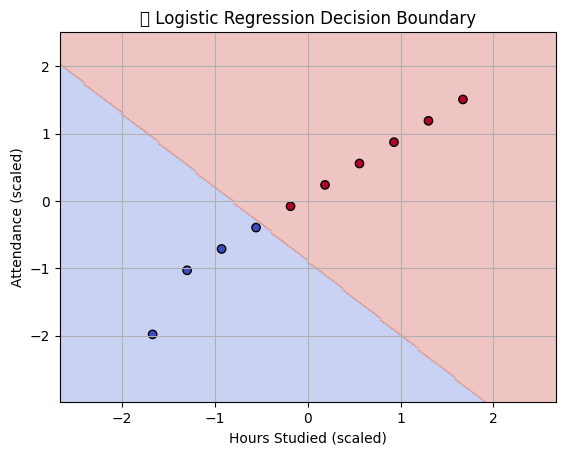

In [31]:
import matplotlib.pyplot as plt

# Combine train + test for clean plotting
X_all = np.vstack((X_train_scaled, X_test_scaled))
y_all = np.concatenate((y_train, y_test))

# Plotting the decision boundary
x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_all[:, 0], X_all[:, 1], c=y_all, cmap='coolwarm', edgecolors='k')
plt.xlabel("Hours Studied (scaled)")
plt.ylabel("Attendance (scaled)")
plt.title("📉 Logistic Regression Decision Boundary")
plt.grid(True)
plt.show()


📌 What It Shows:

- Red/Blue regions = Fail/Pass zones
- Black dots = Real students
- Shows how logistic regression divides input space using a linear boundary